In [7]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
# specifically for cnn
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau, LearningRateScheduler

In [8]:
df_train = pd.read_csv('./input/aptos2019-blindness-detection/train.csv')
df_test = pd.read_csv('./input/aptos2019-blindness-detection/test.csv')

print(df_train.head())

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [9]:
def display_samples(df, columns=4, rows=4):
    fig = plt.figure(figsize=(5*columns, 4*rows))
    for i in range(columns*rows):
        image_path = df.loc[i, 'id_code']
        image_id = df.loc[i, 'diagnosis']
        img = cv2.imread(
            f'./input/aptos2019-blindness-detection/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        a = plt.imshow(img)
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()


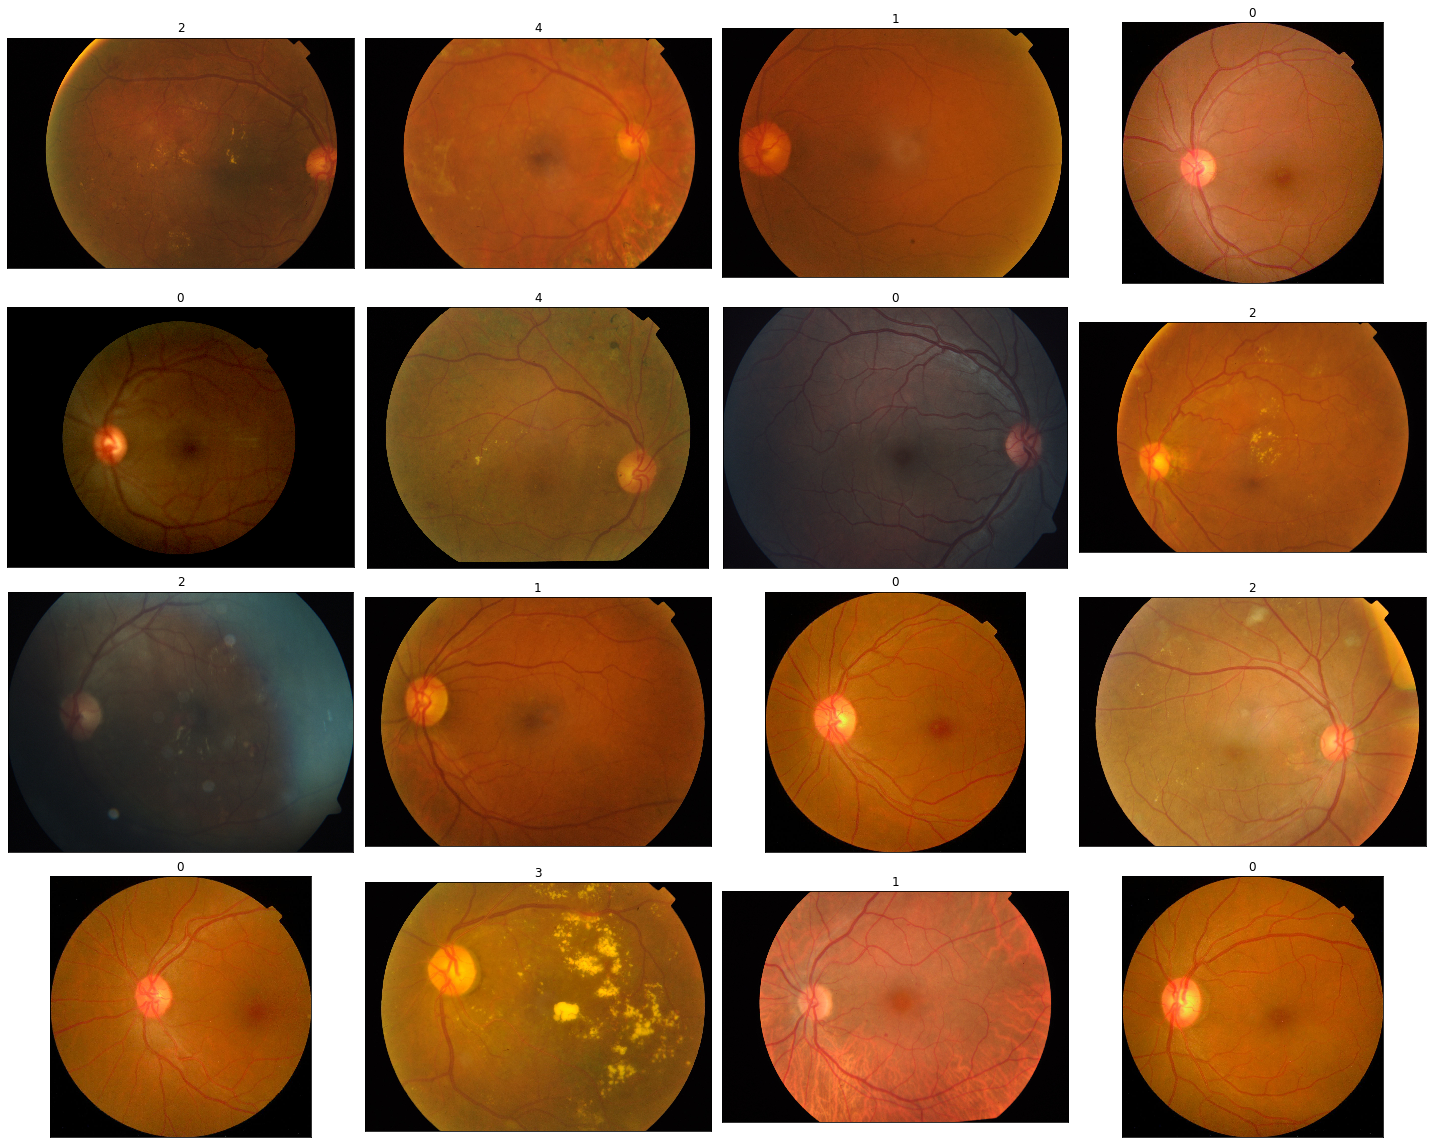

In [10]:
display_samples(df_train)
df_train["id_code"] = df_train["id_code"].apply(lambda x: x+".png")
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_test["id_code"] = df_test["id_code"].apply(lambda x: x+".png")

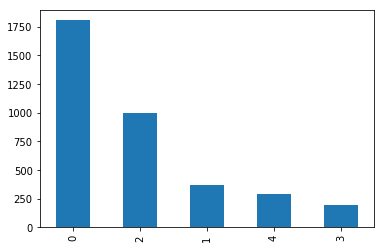

In [11]:
df_train['diagnosis'].value_counts().plot(kind='bar')
plt.show()

In [12]:
nb_classes = 5
lbls = list(map(str, range(nb_classes)))
batch_size = 32
img_size = 150
nb_epochs = 100

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [14]:
training_set = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory="./input/aptos2019-blindness-detection/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    classes=lbls,
    target_size=(img_size, img_size),
    subset='training')

test_set = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory="./input/aptos2019-blindness-detection/train_images",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=batch_size,
    shuffle=True,
    class_mode="categorical",
    classes=lbls,
    target_size=(img_size, img_size),
    subset='validation'
)

Found 2564 validated image filenames belonging to 5 classes.
Found 1098 validated image filenames belonging to 5 classes.


In [15]:
classifier = Sequential()


classifier.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu',
                      input_shape=(img_size, img_size, 3)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

classifier.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

classifier.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'softmax'))

classifier.compile(optimizer = Adam(lr=0.001),loss='categorical_crossentropy', metrics = ["accuracy"])
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = nb_epochs,
                         validation_data = test_set,
                         validation_steps = 10)


W0829 09:42:37.116644 140455834363520 deprecation_wrapper.py:119] From /home/maybeabhishek/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 09:42:37.129243 140455834363520 deprecation_wrapper.py:119] From /home/maybeabhishek/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 09:42:37.131488 140455834363520 deprecation_wrapper.py:119] From /home/maybeabhishek/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 09:42:37.145805 140455834363520 deprecation_wrapper.py:119] From /home/maybeabhishek/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d i

Epoch 1/100
10/10 [==============================] - 78s 8s/step - loss: 1.6052 - acc: 0.4094 - val_loss: 1.3333 - val_acc: 0.4469
Epoch 2/100
10/10 [==============================] - 45s 4s/step - loss: 1.2608 - acc: 0.5750 - val_loss: 1.2479 - val_acc: 0.5312
Epoch 3/100
10/10 [==============================] - 43s 4s/step - loss: 0.9922 - acc: 0.6906 - val_loss: 0.8373 - val_acc: 0.7250
Epoch 4/100
10/10 [==============================] - 38s 4s/step - loss: 0.9127 - acc: 0.6719 - val_loss: 0.8782 - val_acc: 0.7081
Epoch 5/100
10/10 [==============================] - 43s 4s/step - loss: 0.8221 - acc: 0.7156 - val_loss: 0.8325 - val_acc: 0.7000
Epoch 6/100
10/10 [==============================] - 45s 4s/step - loss: 0.8907 - acc: 0.6688 - val_loss: 0.8195 - val_acc: 0.7063
Epoch 7/100
10/10 [==============================] - 41s 4s/step - loss: 0.7549 - acc: 0.6937 - val_loss: 1.0221 - val_acc: 0.6242
Epoch 8/100
10/10 [==============================] - 39s 4s/step - loss: 0.9005 - a

10/10 [==============================] - 39s 4s/step - loss: 0.6154 - acc: 0.7500 - val_loss: 0.7862 - val_acc: 0.7248
Epoch 64/100
10/10 [==============================] - 42s 4s/step - loss: 0.6425 - acc: 0.7625 - val_loss: 0.8430 - val_acc: 0.7063
Epoch 65/100
10/10 [==============================] - 42s 4s/step - loss: 0.6261 - acc: 0.7352 - val_loss: 0.7804 - val_acc: 0.7469
Epoch 66/100
10/10 [==============================] - 39s 4s/step - loss: 0.5186 - acc: 0.8000 - val_loss: 0.8165 - val_acc: 0.6656
Epoch 67/100
10/10 [==============================] - 36s 4s/step - loss: 0.5414 - acc: 0.8000 - val_loss: 0.8254 - val_acc: 0.7416
Epoch 68/100
10/10 [==============================] - 41s 4s/step - loss: 0.5544 - acc: 0.8031 - val_loss: 0.7633 - val_acc: 0.7219
Epoch 69/100
10/10 [==============================] - 43s 4s/step - loss: 0.6219 - acc: 0.7594 - val_loss: 0.8732 - val_acc: 0.7094
Epoch 70/100
10/10 [==============================] - 46s 5s/step - loss: 0.6346 - acc: 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


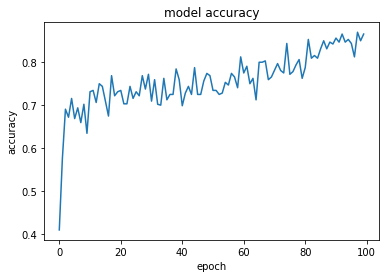

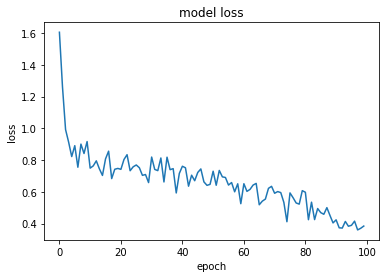

In [16]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [17]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)        83040     
__________

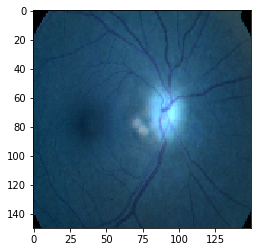

In [18]:
test_image = cv2.imread('./input/aptos2019-blindness-detection/test_images/3d4d693f7983.png', cv2.IMREAD_COLOR)
test_image = cv2.resize(test_image, (150,150))


plt.imshow(test_image)

In [20]:
test_ids = df_test['id_code']

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(  
        dataframe=df_test,
        directory = "./input/aptos2019-blindness-detection/test_images",    
        x_col="id_code",
        target_size = (img_size,img_size),
        batch_size = 1,
        shuffle = False,
        class_mode = None
        )

Found 1928 validated image filenames.


In [22]:
test_generator.reset()
predict=classifier.predict_generator(test_generator, steps = len(test_generator.filenames))

In [23]:
filenames=test_generator.filenames
results=pd.DataFrame({"id_code":filenames,
                      "diagnosis":np.argmax(predict,axis=1)})
results['id_code'] = results['id_code'].map(lambda x: str(x)[:-4])
results.to_csv("submission.csv",index=False)



In [24]:
results.head()

,id_code,diagnosis
0,0005cfc8afb6,2
1,003f0afdcd15,3
2,006efc72b638,2
3,00836aaacf06,2
4,009245722fa4,2
